In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = np.genfromtxt('kmeans.txt',delimiter=' ')

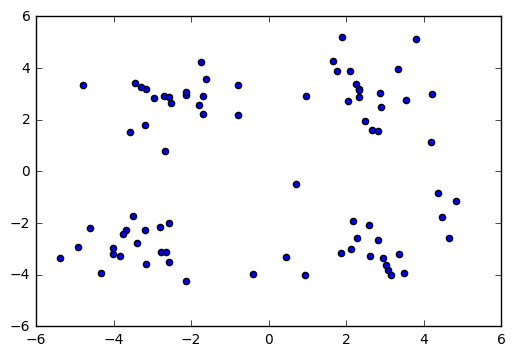

In [14]:
plt.scatter(data[:,0],data[:,1])
plt.show()

In [15]:
def euclDistance(vector1, vector2):
    return np.sqrt(sum((vector1-vector2)**2))

def initCentroids(data, k):
    numSamples, dim = data.shape
    # k个质心，列数跟样本的列数一样
    centroids = np.zeros((k, dim))
    # 随机选出k个质心
    for i in range(k):
        # 随机选取一个样本的索引
        index = int(np.random.uniform(0, numSamples))
        # 作为初始化的质心
        centroids[i,:] = data[index,:]
    return centroids

# 传入数据和k值
def kmeans(data, k):
    # 计算样本的个数
    numSamples = data.shape[0]
    # clusterData样本的属性，行是代表各个样本，第一列保存样本属于哪个簇，
    # 第二列保存样本跟它所属簇的距离
    clusterData = np.array(np.zeros((numSamples, 2)))
    # 决定质心是否要改变
    clusterChanged = True
    
    # 初始化质心
    centroids = initCentroids(data, k)
    
    while clusterChanged:
        clusterChanged = False
        # 循环每一个样本
        for i in range(numSamples):
            # 最小距离
            minDist = 100000.0
            # 定义样本所属的簇
            minIndex = 0
            # 循环计算每一个质心和样本的距离
            for j in range(k):
                # 计算距离
                distance = euclDistance(centroids[j,:],data[i,:])
                if distance < minDist:
                    # 更新最小距离
                    minDist = distance
                    # 更新样本所属的簇
                    minIndex = j
                    # 更新样本保存的最小距离
                    clusterData[i,1] = distance
                  
            # 如果样本所属的簇发生改变
            if clusterData[i,0] != minIndex:
                # 质心发生改变
                clusterChanged = True
                # 更新样本的簇
                clusterData[i,0] = minIndex
        
        # 更新质心
        for j in range(k):
            # 获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:,0]==j)
            # 第j个簇所有的样本点
            pointsInCluster = data[cluster_index]
            # 计算质心
            centroids[j,:] = np.mean(pointsInCluster,axis=0)
        
#         showCluster(data, k, centroids, clusterData)
        
    return centroids, clusterData

In [16]:
# 设置k值
k = 4

# centroids簇的中心
# clusterData样本的属性，行是代表各个样本，第一列保存样本属于哪个簇，
# 第二列保存样本跟它所属簇的距离
centroids,clusterData = kmeans(data, k)

In [17]:
centroids

array([[ 2.6265299 ,  3.10868015],
       [ 2.65077367, -2.79019029],
       [-3.53973889, -2.89384326],
       [-2.46154315,  2.78737555]])

In [18]:
clusterData

array([[ 0.        ,  1.52321748],
       [ 3.        ,  1.17900336],
       [ 1.        ,  2.73308265],
       [ 2.        ,  1.89862393],
       [ 0.        ,  1.66423502],
       [ 3.        ,  1.67362246],
       [ 1.        ,  2.25895462],
       [ 2.        ,  1.17059516],
       [ 0.        ,  1.51442703],
       [ 3.        ,  0.80372102],
       [ 1.        ,  1.31460906],
       [ 2.        ,  0.78044598],
       [ 0.        ,  1.5864911 ],
       [ 3.        ,  0.37244653],
       [ 1.        ,  3.02134578],
       [ 1.        ,  3.2615729 ],
       [ 0.        ,  1.54831171],
       [ 3.        ,  1.76136981],
       [ 1.        ,  0.6380005 ],
       [ 2.        ,  0.70016851],
       [ 0.        ,  0.37243272],
       [ 3.        ,  0.71431155],
       [ 1.        ,  0.99698365],
       [ 2.        ,  0.1787465 ],
       [ 0.        ,  1.14717525],
       [ 3.        ,  0.95299726],
       [ 1.        ,  0.73808875],
       [ 2.        ,  0.56274476],
       [ 0.        ,

In [19]:
# 显示结果
def showCluster(data, k, centroids, clusterData):
    numSamples, dim = data.shape
    if dim !=2 :
        print("dimension of your data is not 2!")
        return 1
    # 用不同颜色形状来表示各个类别
    mark = ['or','ob','og','ok','^r','+r','sr','dr','<r','pr']
    # 画样本点
    for i in range(numSamples):
        # 获取样本点的类别
        markIndex = int(clusterData[i,0])
        plt.plot(data[i,0],data[i,1],mark[markIndex])
    
    # 画质心
    mark = ['*r','*b','*g','*k','^r','+r','sr','dr','<r','pr']
    for i in range(k):
        plt.plot(centroids[i,0], centroids[i,1], mark[i], markersize = 20)
    plt.show()

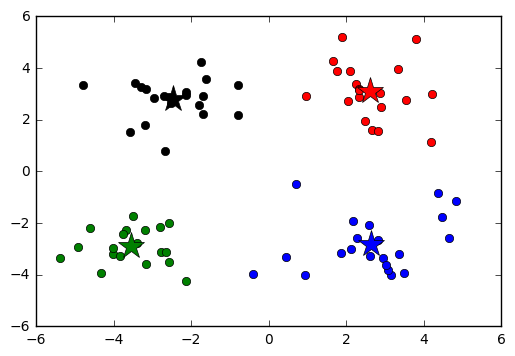

In [20]:
showCluster(data, k, centroids, clusterData)

# 做预测

In [21]:
x_test = [0,1]

In [22]:
np.tile(x_test,(k,1))

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [23]:
np.tile(x_test,(k,1)) - centroids

array([[-2.6265299 , -2.10868015],
       [-2.65077367,  3.79019029],
       [ 3.53973889,  3.89384326],
       [ 2.46154315, -1.78737555]])

In [24]:
(np.tile(x_test,(k,1)) - centroids)**2

array([[  6.89865932,   4.44653198],
       [  7.02660103,  14.3655424 ],
       [ 12.52975144,  15.16201536],
       [  6.05919468,   3.19471136]])

In [25]:
((np.tile(x_test,(k,1)) - centroids)**2).sum(axis=1)

array([ 11.34519129,  21.39214343,  27.6917668 ,   9.25390604])

In [26]:
np.sqrt(((np.tile(x_test,(k,1)) - centroids)**2).sum(axis=1))

array([ 3.36826235,  4.62516415,  5.26229672,  3.04202335])

In [27]:
np.argmin(np.sqrt(((np.tile(x_test,(k,1)) - centroids)**2).sum(axis=1)))

3

In [28]:
def predict(datas):
    return np.array([np.argmin(np.sqrt(((np.tile(data,(k,1)) - centroids)**2).sum(axis=1))) for data in datas])

# 画出每个簇的区域

C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


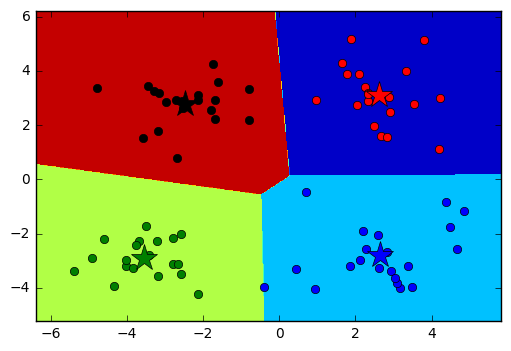

In [29]:
# 获取数据值所在的范围
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)

showCluster(data, k, centroids, clusterData)

In [30]:
predict(data)

array([0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 1, 0, 3, 1, 2, 0, 3, 1,
       2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3,
       1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0,
       3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2], dtype=int64)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


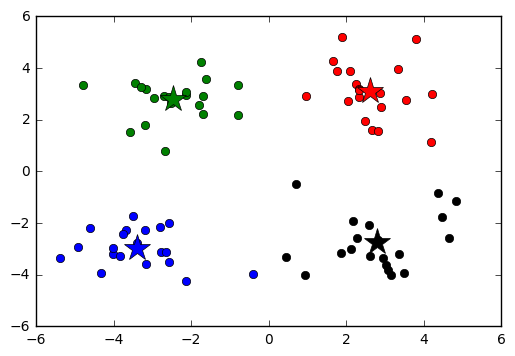

In [51]:
# 设置k值
k = 4
min_loss = 10000
min_loss_centroids = np.array([])
min_loss_clusterData = np.array([])

for i in range(50):
    # centroids簇的中心
    # clusterData样本的属性，行是代表各个样本，第一列保存样本属于哪个簇，
    # 第二列保存样本跟它所属簇的距离
    centroids,clusterData = kmeans(data, k)
    loss = sum((clusterData[:,1])**2)/data.shape[0]
    if loss < min_loss:
        min_loss = loss
        min_loss_centroids = centroids
        min_loss_clusterData = clusterData
        
centroids = min_loss_centroids
clusterData = min_loss_clusterData

showCluster(data, k, centroids, clusterData)